# **Imports:**

In [41]:
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Loading Dataset:**

In [2]:
# Loading our dataset and solving the imbalancing issue.

# The following code is only to read the data and balance it.


path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

print("Path to dataset files:", path)

import os
print("Downloaded Path:", path)
print("Files in Directory:", os.listdir(path))  # List all files in the directory

import pandas as pd

csv_file = os.path.join(path, "Loan.csv")
data = pd.read_csv(csv_file)


100%|██████████| 2.15M/2.15M [00:00<00:00, 3.52MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2
Downloaded Path: /root/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2
Files in Directory: ['Loan.csv', 'CSV Generation.py']


In [3]:
categorical_features = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

y=data['LoanApproved']
x=data.drop(columns=['LoanApproved'],axis=1)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Learning Curve**

##**Learning Curve for KNN:**


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)


In [8]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

***Plot KNN learning curves***

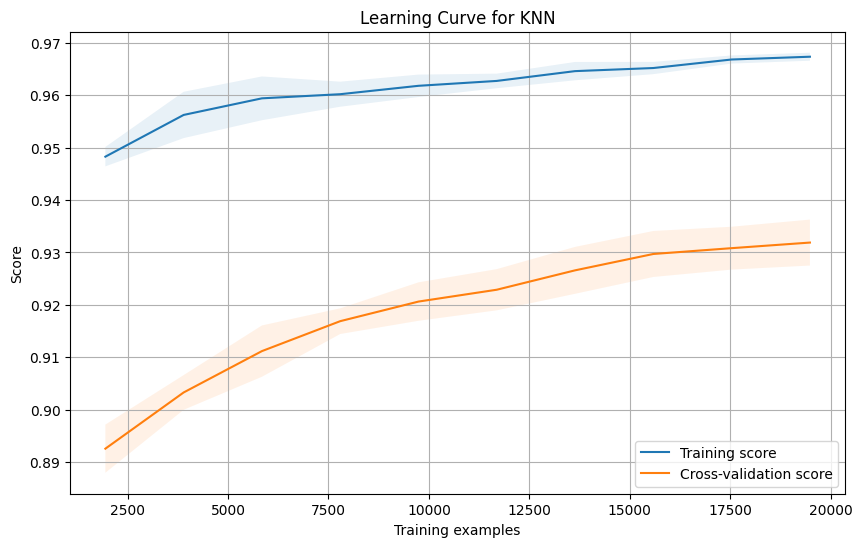

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for KNN')
plt.legend(loc='best')
plt.grid()
plt.show()

**Explain The Result:**

.........................................

##**Learning Curve for Logestic Regression:**

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logreg,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

In [12]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

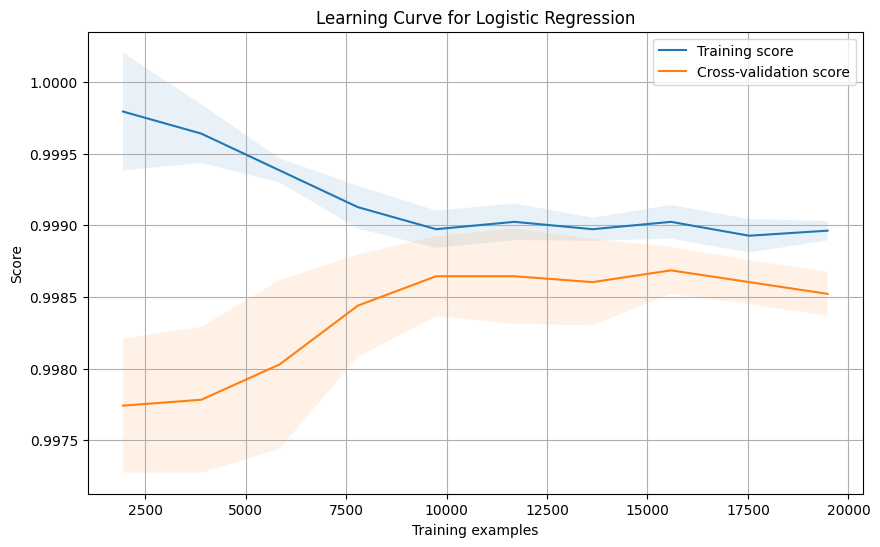

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()

**Explain The Result:**

.........................................

##**Learning Curve for Neural Network:**

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [15]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=nn,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)


In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

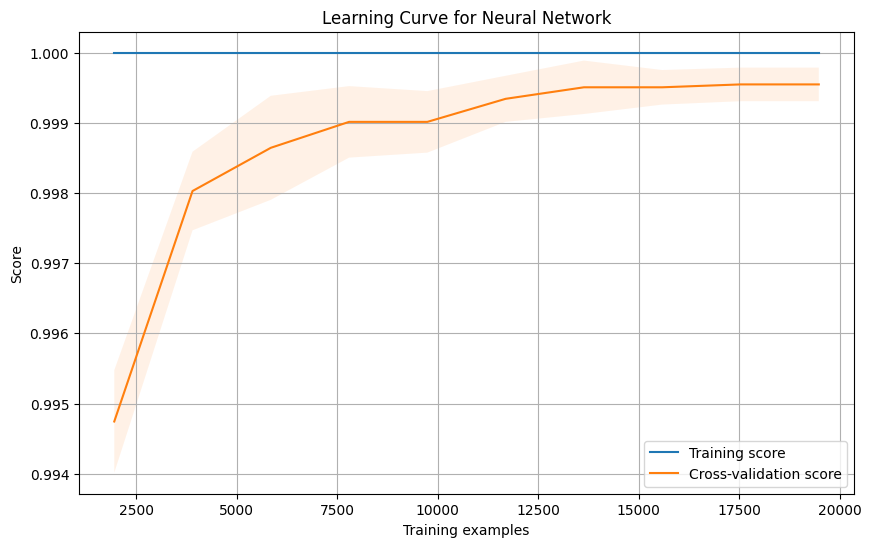

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Neural Network')
plt.legend(loc='best')
plt.grid()
plt.show()

**Explain The Result:**

.........................................

# **Validation Curve:**

##**Validation Curve for KNN:**

In [18]:
param_range = np.arange(1, 21, 2)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [19]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

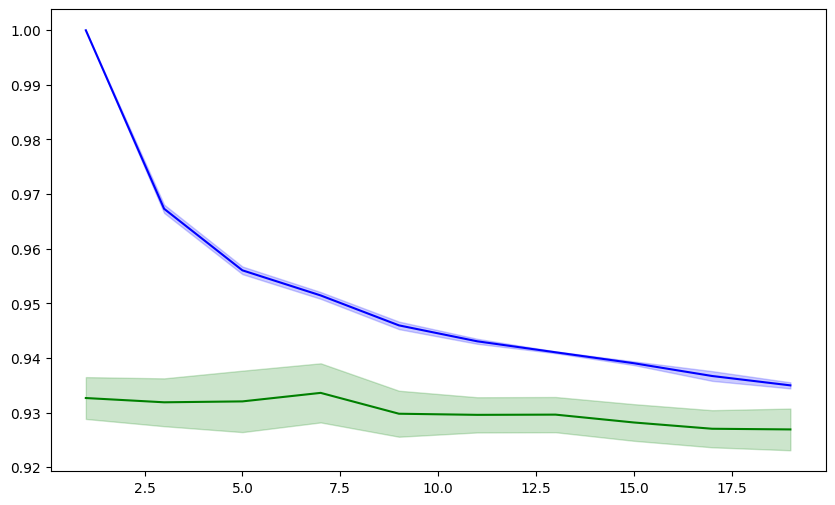

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")


**Explain The Result:**

.........................................

##**Validation Curve for Logetstic Regression:**

In [21]:
param_range = np.logspace(-4, 4, 5)
train_scores, test_scores = validation_curve(
    LogisticRegression(max_iter=10000),
    X_train,
    y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [22]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

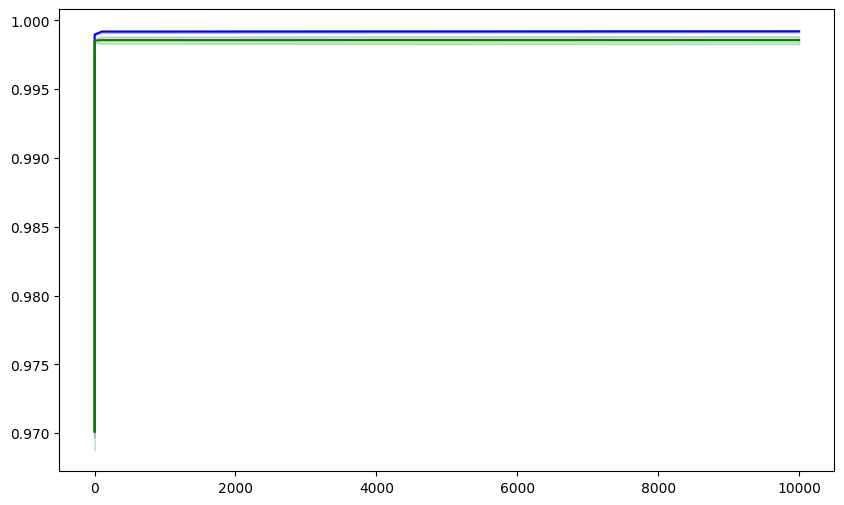

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")


**Explain The Result:**

.........................................

##**Validation Curve for NN:**

In [24]:
param_range = [(50,), (100,), (150,), (200,)]

In [25]:
train_scores, test_scores = validation_curve(
    MLPClassifier(max_iter=1000, random_state=42),
    X_train,
    y_train,
    param_name="hidden_layer_sizes",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [26]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

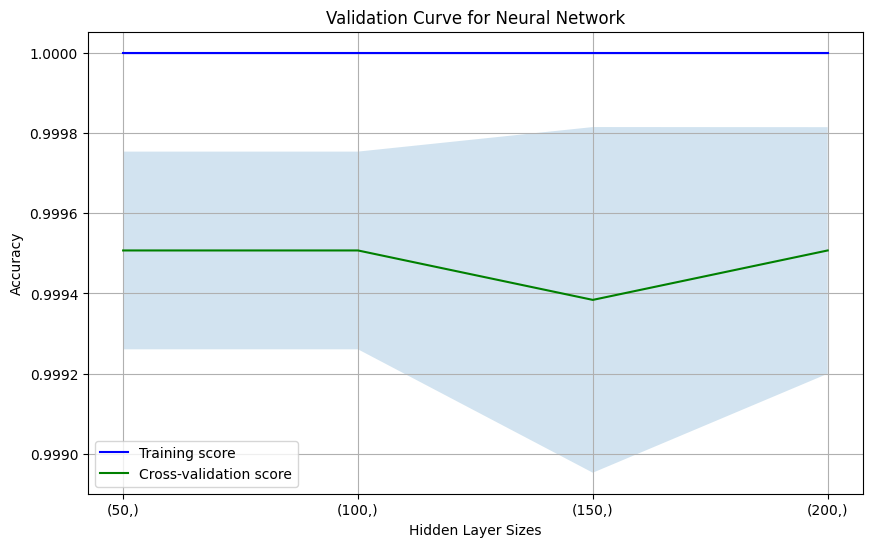

In [27]:
plt.figure(figsize=(10, 6))
x_values = [str(size) for size in param_range]
plt.plot(x_values, train_mean, label="Training score", color="blue")
plt.fill_between(x_values, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(x_values, test_mean, label="Cross-validation score", color="green")
plt.fill_between(x_values, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Validation Curve for Neural Network")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Explain The Result:**

.........................................

# **Confusion Matrix:**

##**Confusion Matrix for KNN:**

In [28]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

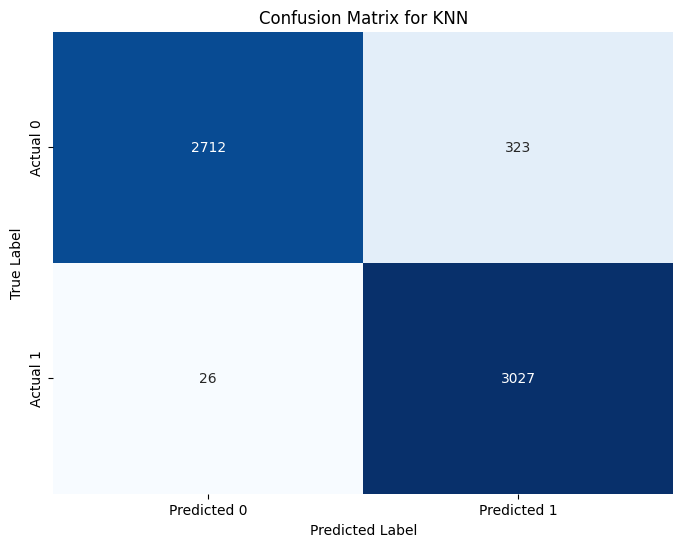

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- How many True Negatives? - What does this number mean?

##**Confusion Matrix for Logetstic Regression:**

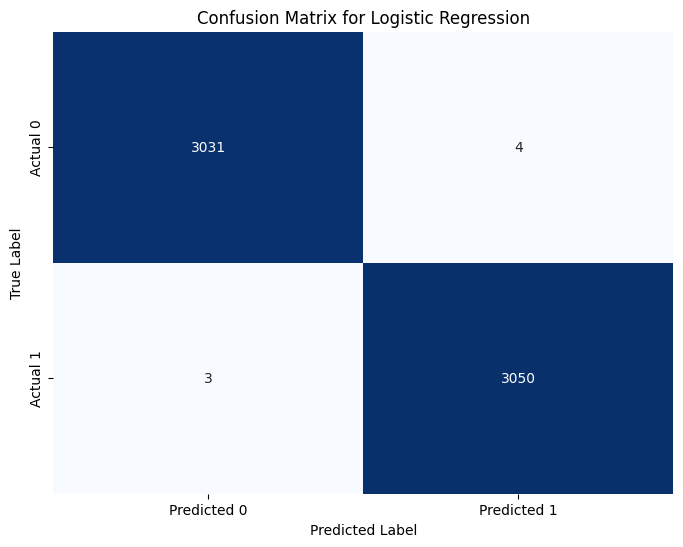

In [30]:
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- How many False Positives?  What does this number mean?

##**Confusion Matrix for NN:**

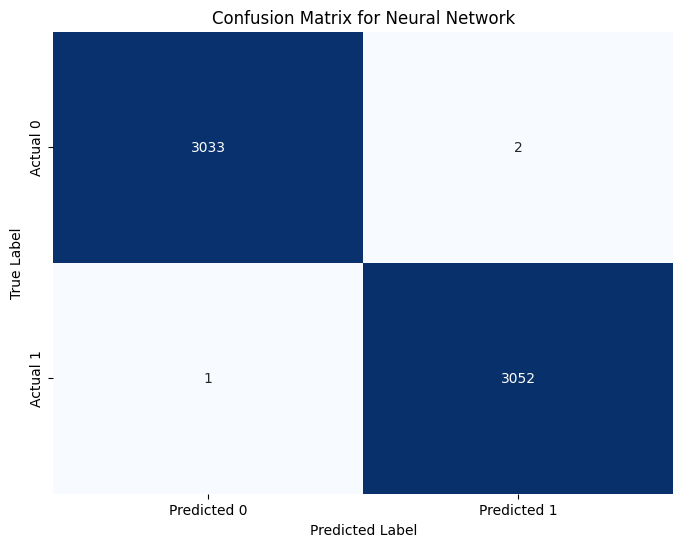

In [31]:
y_pred_nn = nn.predict(X_test)
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- How many False Negatives?  What does this number mean?

#**Compute F1-Score for all models:**

In [32]:
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-Score for KNN: {f1_knn}")

f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"F1-Score for Logistic Regression: {f1_logreg}")

f1_nn = f1_score(y_test, y_pred_nn)
print(f"F1-Score for Neural Network: {f1_nn}")


F1-Score for KNN: 0.9454942995470873
F1-Score for Logistic Regression: 0.9988537743572949
F1-Score for Neural Network: 0.9995087604388406


## **Receiver Operating Characteristic (ROC) Curve For Logestic Regression:**

In [33]:
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

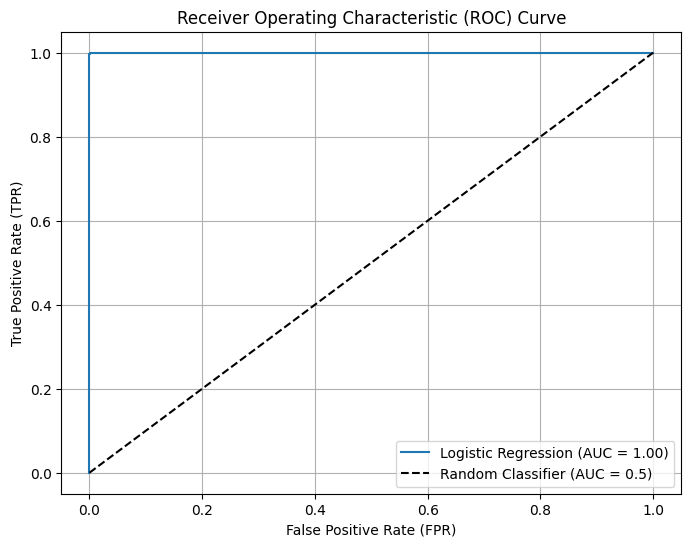

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Diiferntiate between:

- High AUC (close to 1)

- Low AUC (close to 0)

- AUC around 0.5

# **Filter-based features selection techniques:**

**Any Correlation should be done using Pearson and Spearman**

**Question 1:**

What are the most important 4 features for the output?

In [35]:
# Measure the feature importnace for all features in your dataset using (Fisher’s Score)
chi2_scores, p_values = chi2(x, y)

feature_importance = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chi2_scores})

feature_importance = feature_importance.sort_values('Chi2 Score', ascending=False)

print(feature_importance.head(4))

          Feature    Chi2 Score
2    AnnualIncome  1.967578e+08
29       NetWorth  1.357989e+08
24    TotalAssets  1.019096e+08
26  MonthlyIncome  1.621599e+07


In [36]:
# Measure the feature importnace for all features in your dataset using (Correlation Coefficient)
correlation_coefficients = X_resampled.corrwith(y_resampled)

feature_importance = pd.DataFrame({'Feature': X_resampled.columns, 'Correlation Coefficient': correlation_coefficients})

feature_importance = feature_importance.reindex(feature_importance['Correlation Coefficient'].abs().sort_values(ascending=False).index)

feature_importance

,Feature,Correlation Coefficient
RiskScore,RiskScore,-0.842471
MonthlyIncome,MonthlyIncome,0.594479
AnnualIncome,AnnualIncome,0.587040
TotalDebtToIncomeRatio,TotalDebtToIncomeRatio,-0.541180
InterestRate,InterestRate,-0.373028
LoanAmount,LoanAmount,-0.318052
BaseInterestRate,BaseInterestRate,-0.309633
MonthlyLoanPayment,MonthlyLoanPayment,-0.249354
NetWorth,NetWorth,0.180588
TotalAssets,TotalAssets,0.177293


In [37]:
# Measure the feature importnace for all features in your dataset using (Variance Threshold) --> (Try 3 different thresholds and Compare!)
thresholds = [0.01, 0.1, 0.2]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_train_high_variance = selector.fit_transform(X_train)

    selected_feature_indices = selector.get_support(indices=True)

    selected_feature_names = x.columns[selected_feature_indices]
    print(f"Variance Threshold: {threshold}")
    print(f"Number of selected features: {len(selected_feature_names)}")
    print("Selected features:", selected_feature_names)
    print("-" * 20)

**Question 2:**

Are there any features taht are dependent on each other?

In [38]:
# Write your code to acieve the answer here.
correlation_matrix = X_resampled.corr()

threshold = 0.8
dependent_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            dependent_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Highly correlated feature pairs:")
for feature1, feature2, correlation in dependent_features:
    print(f"{feature1} and {feature2}: {correlation}")

**Question 3:**

From Question 1, Have you found the most correlated feature withe target variable? Now find the most correlated 3 features with it using Chi-squre Test Scores.

In [39]:
# Write your code to acieve the answer here.
chi2_scores, p_values = chi2(x, y)

feature_importance_chi2 = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chi2_scores})

feature_importance_chi2 = feature_importance_chi2.sort_values('Chi2 Score', ascending=False)

print(feature_importance_chi2.head(3))

**Question 4:**

From Questions 1, and 3; How many features do you have now as outputs? Use them (instead of all features) to re-build the previous 3 models.

In [40]:
# Write your code to acieve the answer here.
important_features = list(feature_importance.head(4)['Feature']) + list(feature_importance_chi2.head(3)['Feature'])

final_features = list(set(important_features))

X_train_selected = X_train[:, [list(x.columns).index(feature) for feature in final_features]]
X_test_selected = X_test[:, [list(x.columns).index(feature) for feature in final_features]]

knn_selected = KNeighborsClassifier(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train)

logreg_selected = LogisticRegression(max_iter=1000)
logreg_selected.fit(X_train_selected, y_train)

nn_selected = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_selected.fit(X_train_selected, y_train)